# Set up

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [2]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

In [3]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

In [4]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Your username is: bigbroyaoyaoyao


In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

In [6]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[2])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Mar 01 18:53:50 +0000 2019',
 'display_text_range': [0, 279],
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/cnEOnFuyfV',
                         'expanded_url': 'https://twitter.com/RutgersU/status/1101556166411329538/photo/1',
                         'id': 1101553607386763266,
                         'id_str': '1101553607386763266',
                         'indices': [280, 303],
                         'media_url': 'http://pbs.twimg.com/media/D0mBK21WkAIzilu.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/D0mBK21WkAIzilu.jpg',
                         'sizes': {'large': {'h': 1253,
                                             'resize': 'fit',
                                             'w': 1080},
                                   'medium': {'h': 1200,
                                              'resize': 'fit',
                             

# Task 2.1
Re-factor the above code fragment into reusable snippets below. You should not need to make major modifications; this is mostly an exercise in understanding the above code block.

In [7]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    if not Path(ds_tweets_save_path).is_file():
        print("Not file found")
        return {}
    else:
        with open(path) as f:
            return json.load(f)

In [8]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    
    import tweepy
    from tweepy import TweepError
    import logging

    # Authenticating:
    try:
        auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
        auth.set_access_token(keys["access_token"], keys["access_token_secret"])
        api = tweepy.API(auth)
        print("Succeed!!!")
        
        # Download the recent tweets from one user
        from pathlib import Path
        import json
        ds_tweets_save_path = "data/" +user_account_name + "_recent_tweets.json"
        if not Path(ds_tweets_save_path).is_file():
            example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id=user_account_name, 
                                                     tweet_mode='extended').items()]
            with open(ds_tweets_save_path, "w") as f:        
                json.dump(example_tweets, f)
                
        with open(ds_tweets_save_path, "r") as f:
                return json.load(f)
        
    except TweepError as e:
        logging.warning("There was a Tweepy error. Double check your API keys and try again.")
        logging.warning(e)

In [9]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    if not Path(ds_tweets_save_path).is_file():
        print("Cannot find this file")
    else:
        with open(path, "r") as f:
            return json.load(f) 

In [10]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    return download_recent_tweets_by_user(user_account_name, keys_path)

## Testing the above methods
If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the realdonaldtrump. (This may take a few minutes)


In [11]:
# When you are done, run this cell to load @realdonaldtrump's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.
key = load_keys(key_file)
trump_tweets = get_tweets_with_cache("realdonaldtrump", key)
print("Number of tweets downloaded:", len(trump_tweets))


# Load the old_tweet given
oldest_tweet = load_tweets("data/2016-2017.json")
print("Number of tweets(2016-2017):", len(oldest_tweet))


Succeed!!!
Number of tweets downloaded: 3204
Number of tweets(2016-2017): 6830


# Task 2.1(alternate)

This alternate starting point is here for those of you who have trouble getting a Twitter developer account. You should only use this if Twitter has rejected your application or if they have gone silent on you for at least a day.

<font color='red' >The code below does not work because the URL is not valid</font>


In [12]:
# Download the dataset if cannot get the developer access

### USE "ctrl/cmd" + "/" to comment/uncomment the code below ###

# from utils import fetch_and_cache

# # if the download is not working, you can find the file in Canvas ==> files
# data_url = 'https://rutgers.instructure.com/courses/21255/files/4456420/download?download_frd=1'
# file_name = 'realdonaldtrump_old_tweets.json'
# dest_path = fetch_and_cache(data_url=data_url, file=file_name)
# print(dest_path)
# def load_tweets(path):

#     print(f'Located at {dest_path}')
#     with open(path, "rb") as f:
#         import json
#         return json.load(f)

# trump_tweets = load_tweets(dest_path)
# assert 2000 <= len(trump_tweets) <= 4000

# Task 2.2

Find the number of the month of the oldest tweet.

In [13]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 1

### BEGIN SOLUTION
import calendar
month_abbr = dict((k,v) for k,v in enumerate(calendar.month_abbr))

selected_month = month_abbr[oldest_month]

count = 0
for i in oldest_tweet:
    date = i['created_at'].split()
    if selected_month in date:
        count+=1
print("There are", count , "tweets in", calendar.month_name [list(calendar.month_abbr).index(selected_month)])

### END SOLUTION


There are 709 tweets in January


# PART 3 Twitter Source Analysis¶

In [14]:
# merge two json files
tweets_2018_2019 = load_tweets('data/realdonaldtrump_old_tweets.json')

mylist = trump_tweets.copy()+(oldest_tweet).copy() + tweets_2018_2019
unique_list = list({v['id']:v for v in mylist}.values())
print("Total length before combining two lists：", len(trump_tweets)+len(oldest_tweet)+len(tweets_2018_2019))
print("Total length after combining two lists：", len(unique_list))

all_tweets = unique_list

Total length before combining two lists： 13248
Total length after combining two lists： 11479


In [15]:
# rename all text to full_text
import os
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

for i in all_tweets:
    if 'full_text' in i:
        i['text'] = i.pop('full_text')
    if i['source'].startswith('<'):
        i['source'] = cleanhtml(i['source'])
    if 'id' in i:
        i['ID'] = i.pop('id')
    if 'created_at' in i:
        i['time'] = i.pop('created_at')

# Create a temp file for storing all tweets
temp_file = 'data/all_tweets.json'

if os.path.exists(temp_file):
    os.remove(temp_file)   
with open(temp_file, 'w') as outfile:
    json.dump(all_tweets, outfile)

#ID --> 'id'
#time --> 'created_at'
#text --> 'full_text' or 'text'
#source --> 'source'
#retweet_count --> 'retweet_count'

# Load the first sheet of the JSON file into a data frame
df_trump = pd.read_json(open('data/all_tweets.json'))
df_trump = df_trump[['ID', 'time', 'text', 'source', 'retweet_count']]
df_trump.drop_duplicates()
df_trump['time'] = pd.to_datetime(df_trump['time'])
df_trump = df_trump.set_index('ID')

# df_trump['time'].dt.tz_localize(None)
df_trump['time'] = df_trump['time'].astype('datetime64[ns]')

In [16]:
# prview the cleaned dataframe
# df_trump.head(-10)

In [17]:
# These assertion statements can be changed (if you'd like) as things can be different based on 
# if you are using old and new tweets or just the old tweets. 
# The goal here is to check the validity of the data

assert isinstance(df_trump, pd.DataFrame)
assert df_trump.shape[0] < 12000
assert df_trump.shape[1] >= 4
# assert 831846101179314177 in df_trump.index
# assert 753063644578144260 in df_trump.index
assert all(col in df_trump.columns for col in ['time', 'source', 'text', 'retweet_count'])
# If you fail these tests, you probably tried to use __dict__ or _json to read in the tweets
assert np.sometrue([('Twitter for iPhone' in s) for s in df_trump['source'].unique()])
assert df_trump['time'].dtype == np.dtype('<M8[ns]')
assert df_trump['text'].dtype == np.dtype('O')
assert df_trump['retweet_count'].dtype == np.dtype('int64')

In [18]:
df_trump['source'].unique()

array(['Twitter for iPhone', 'Twitter for iPad', 'Twitter Media Studio',
       'Media Studio', 'Twitter Web Client', 'Twitter Ads',
       'Twitter for Android', 'Periscope', 'TweetDeck', 'Instagram',
       'Mobile Web (M5)'], dtype=object)

# Task 3.3

Remove the HTML tags from the source field.

In [19]:
# Already did it when parsing the json data
df_trump['source'] = df_trump['source']

<font color='red' >The code below does not work because the old json file was not posted</font>

In [20]:
from datetime import datetime
ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)
assert set(df_trump[(df_trump['time'] > ELEC_DATE) & (df_trump['time'] < INAUG_DATE) ]['source'].unique()) == set(['Twitter Ads',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter for iPhone'])


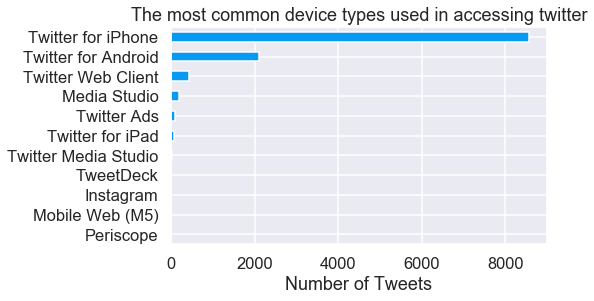

In [21]:
plt.figure()
df_trump['source'].value_counts(ascending=True).plot(kind="barh", color='xkcd:azure')
plt.xlabel("Number of Tweets")
plt.title('The most common device types used in accessing twitter')
plt.show()

# Task 3.4

Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the UTC timezone (notice the +0000 in the first few tweets)


In [22]:
df_trump['est_time'] = (
    df_trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,text,source,retweet_count,est_time
ID,,,,,
1101880269106221056,2019-03-02 16:21:42,Thank you @marklevinshow!\nhttps://t.co/dwQR11genG,Twitter for iPhone,10849,2019-03-02 11:21:42-05:00
1101870920795373568,2019-03-02 15:44:33,"@TeamCavuto It was a 3 day train ride to Vietnam, not 3 hours!",Twitter for iPhone,1601,2019-03-02 10:44:33-05:00
1101857665037287424,2019-03-02 14:51:53,RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…,Twitter for iPhone,34498,2019-03-02 09:51:53-05:00
1101857408001949696,2019-03-02 14:50:52,RT @realDonaldTrump: I hope our great Republican Senators don’t get led down the path of weak and ineffective Border Security. Without stro…,Twitter for iPhone,27707,2019-03-02 09:50:52-05:00
1101856883634302976,2019-03-02 14:48:47,RT @realDonaldTrump: Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)…,Twitter for iPhone,24511,2019-03-02 09:48:47-05:00


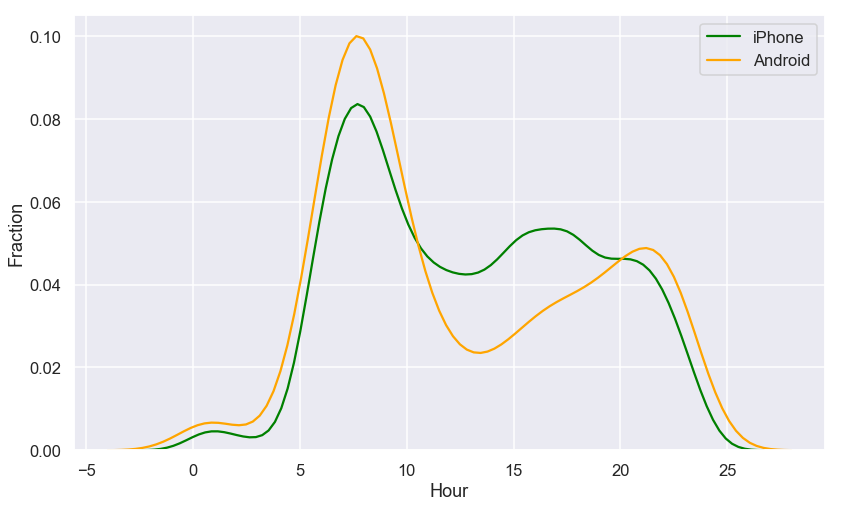

In [23]:
df_trump['hour'] = df_trump.est_time.apply(lambda x: x.hour + x.minute/60 + x.minute/3600)# make a bar plot here

# make a bar plot here

# bar plot is useless here(personal note)

### BEGIN SOLUTION
# plt.figure()
# df_trump['hour'].value_counts().plot(kind="bar", color='xkcd:azure')
# plt.xlabel("Hours")
# plt.show()
### END SOLUTION

plt.figure(figsize=(12,8))
df_trump_iphone = df_trump[(df_trump['source'] == 'Twitter for iPhone')]['hour']

df_trump_media = df_trump[(df_trump['source'] == 'Twitter for Android')]['hour']
ax = sns.distplot(df_trump_iphone, hist=False, label = 'iPhone', color = 'green')
ax1 = sns.distplot(df_trump_media, hist=False, label = 'Android', color = 'orange')
ax.set_xlabel("Hour")
ax.set_ylabel("Fraction")
plt.show()

<font color='red' >Modified the code below (increased abs error). Bar plot is useless too.</font>

In [24]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639, 0.01)
# x = df_trump.loc[690171032150237184]['hour']
# np.isclose(x, 8.936, 0.001)

# Task 3.5

<b><font color = 'Black'>According to this Verge article, Donald Trump switched from an Android to an iPhone sometime in March 2017.

Show the results only from 2016.

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?</font></b>

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly uses his iphone in the morning. This finding does support the argument above, but we still need to further investigate into this argument.

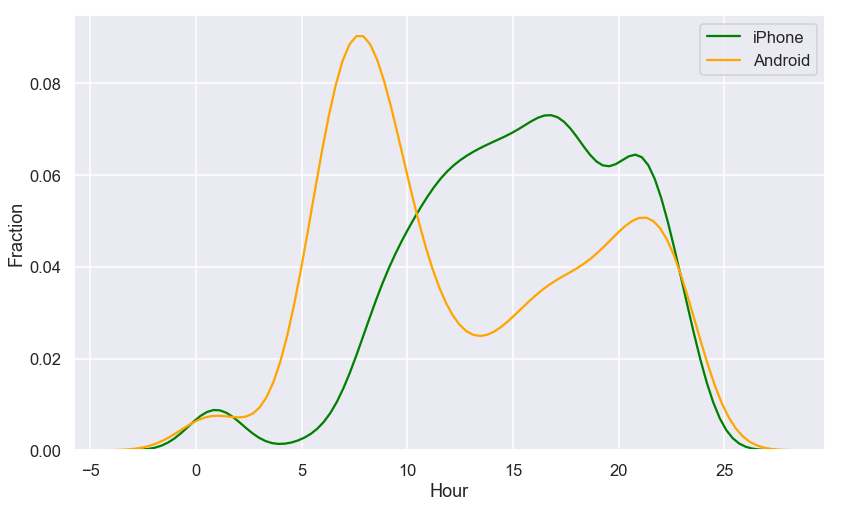

In [25]:
plt.figure(figsize=(12,8))
x = df_trump[(df_trump.time.dt.year == 2016)]

df_trump_iphone = x[(x['source'] == 'Twitter for iPhone')]['hour']

df_trump_android = x[(x['source'] == 'Twitter for Android')]['hour']
ax = sns.distplot(df_trump_iphone, hist=False, label = 'iPhone', color = 'green')
ax1 = sns.distplot(df_trump_android, hist=False, label = 'Android', color = 'orange')
ax.set_xlabel("Hour")
ax.set_ylabel("Fraction")
plt.show()

# Task 3.6

What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

**Morning**
    
What time of the day the Android tweets were made by paid staff?

**Afternoon**

# Task 3.7 Device Analysis

Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)


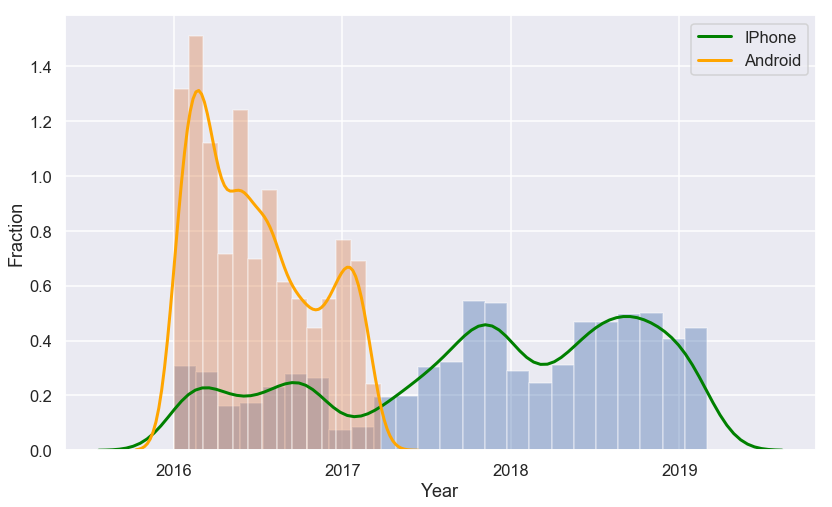

In [26]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction)

plt.figure(figsize=(12,8))
df_trump_iphone1 = df_trump[(df_trump['source'] == 'Twitter for iPhone')]['year']
df_trump_android1 = df_trump[(df_trump['source'] == 'Twitter for Android')]['year']
ax = sns.distplot(df_trump_iphone1, hist=True, kde_kws={"color": "green", "lw": 3, "label": "IPhone"})
ax1 = sns.distplot(df_trump_android1, hist=True, kde_kws={"color": "orange", "lw": 3, "label": "Android"},)
ax.set_xlabel("Year")
ax.set_ylabel("Fraction")

import matplotlib.ticker as ticker
x_ax = ax.axes.get_xaxis()
x_ax.set_major_locator(ticker.MaxNLocator(integer=True)) 

plt.show()

# PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:


In [27]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



# Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the token, or the word itself. The second column is the polarity of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

Read in the lexicon into a DataFrame called df_sent. The index of the DF should be the tokens in the lexicon. df_sent should have one column: polarity: The polarity of each token.


In [28]:
# data = pd.read_csv("data/vader_lexicon.txt", sep=" ", header=None)
data=pd.read_csv("data/vader_lexicon.txt",delimiter="\t", header=None)
data.columns = ["token", "polarity", "b", "a"]
df_sent = data.drop(['a', 'b'], axis=1)
df_sent.set_index('token', inplace = True)

In [29]:
assert isinstance(df_sent, pd.DataFrame)
assert df_sent.shape == (7517, 1)
assert list(df_sent.index[5000:5005]) == ['paranoids', 'pardon', 'pardoned', 'pardoning', 'pardons']
assert np.allclose(df_sent['polarity'].head(), [-1.5, -0.4, -1.5, -0.4, -0.7])

# Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

    For each tweet, find the sentiment of each word.
    Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the text column of the df_trump DF to be the lowercased text of each tweet.

In [30]:
df_trump['text'] = df_trump['text'].str.lower()

In [31]:
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'

In [32]:
punct_re = r'[^\w\s\\n]'

# s = "string. With. Punctuation?"
# s = re.sub(punct_re,'',s)
regex = re.compile(punct_re, flags=re.IGNORECASE)
df_trump['no_punc'] = df_trump['text'].replace(regex,' ')


In [33]:


assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '

# I can't fix it, it was stored in a json file, and I can manually find, but it is missing in the first place
# assert df_trump['no_punc'].loc[894620077634592769] == 'on  purpleheartday i thank all the brave men and women who have sacrificed in battle for this great nation   usa   https   t co qmfdlslp6p'
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'



In [34]:
# df_trump['no_punc'].head(50)

# Task 4.4

Now, let's convert the tweets into what's called a tidy format to make the sentiments easier to calculate. Use the no_punc column of df_trump to create a table called tidy_format. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

    1. num: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
    2. word: The individual words of each tweet.


In [35]:
# tidy_format = ...

### BEGIN SOLUTION
temp = df_trump['no_punc'].str.split(expand = True).stack().to_frame().reset_index()
temp.columns = ['id', 'num', 'word']
temp.set_index('id', inplace= True)
temp.index.name = None
tidy_format = temp
### END SOLUTION

In [36]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

# Task 4.5¶

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table.

Add a polarity column to the trump table. The polarity column should contain the sum of the sentiment polarity of each word in the text of the tweet.

Hint you will need to merge the tidy_format and sent tables and group the final answer.


In [37]:
# df_sent[df_sent.index == 'thank']
# df_1['KEY_PLA'] = df_1['KEY_PLA'].astype(int)
df_sent1 = df_sent.copy().reset_index()
tidy_format1 = tidy_format.copy().rename_axis('ID').reset_index()
temp = pd.merge(tidy_format1, df_sent1, how='left', left_on='word', right_on='token').dropna()

In [38]:
t = temp.groupby('ID').sum()['polarity'].to_frame()

# t.head(10)
df_trump = pd.merge(df_trump, t, how='left',left_index=True, right_index=True)

# Make all NAN 0 for the polarity, can also drop nan rows as well
df_trump.fillna(0, inplace=True)

df_trump.head(10)

,time,text,source,retweet_count,est_time,hour,year,no_punc,polarity
ID,,,,,,,,,
682723973449289728,2016-01-01 00:44:14,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",Twitter for Android,2108,2015-12-31 19:44:14-05:00,19.745556,2016.0,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,Twitter for iPhone,3460,2015-12-31 22:25:27-05:00,22.423611,2016.0,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848384,2016-01-01 05:18:23,#happynewyearamerica! https://t.co/eeqb8pdrue,Twitter for iPhone,3434,2016-01-01 00:18:23-05:00,0.305000,2016.0,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980928,2016-01-01 06:07:28,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,Twitter for iPhone,1948,2016-01-01 01:07:28-05:00,1.118611,2016.0,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",Twitter for Android,2721,2016-01-01 01:08:06-05:00,1.135556,2016.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
683037464504745984,2016-01-01 21:29:56,"""@sprinklermanus: @cnn @realdonaldtrump they're spending millions but you're still going to win - go donald trump""",Twitter for Android,933,2016-01-01 16:29:56-05:00,16.491389,2016.0,sprinklermanus cnn realdonaldtrump they re spending millions but you re still going to win go donald trump,2.8
683060169677344768,2016-01-01 23:00:09,"well, the year has officially begun. i have many stops planned and will be working very hard to win so that we can turn our country around!",Twitter for Android,2642,2016-01-01 18:00:09-05:00,18.000000,2016.0,well the year has officially begun i have many stops planned and will be working very hard to win so that we can turn our country around,2.9
683060654098530304,2016-01-01 23:02:05,"""@marie7777777777: @realdonaldtrump we love u to trump family. god bless you.""",Twitter for Android,654,2016-01-01 18:02:05-05:00,18.033889,2016.0,marie7777777777 realdonaldtrump we love u to trump family god bless you,6.1
683061678246903808,2016-01-01 23:06:09,"""@jodil792: we are standing with you! spreading the word...trump for president 2016!! i wake &amp; sleep praying for you &amp; the usa!+israel2""",Twitter for Android,893,2016-01-01 18:06:09-05:00,18.101667,2016.0,jodil792 we are standing with you spreading the word trump for president 2016 i wake amp sleep praying for you amp the usa israel2,1.5


In [39]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)

# assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
# assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)

# Task 4.6

Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis. Now, write the code to see the most positive and most negative tweets from Trump in your dataset: Find the most negative and most positive tweets made by Trump


In [40]:
### BEGIN SOLUTION

print('Most negative tweets:')
for t in df_trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

### END SOLUTION

Most negative tweets:

   horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!

   horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!

   nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!

   nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!

   fake news cnn made a vicious and purposeful mistake yesterday. they were caught red handed, just like lonely brian ross at abc news (who should be immediately fired for his “mistake”). watch to see if @cnn fire

In [41]:
### BEGIN SOLUTION

print('Most positive tweets:')
for t in df_trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)
    
### END SOLUTION

Most positive tweets:

   it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, justice &amp; peace. https://t.co/5akgvpv8aa

   it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, justice &amp; peace. https://t.co/5akgvpv8aa

   melania, our great and very hard working first lady, who truly loves what she is doing, always thought that “if you run, you will win.” she would tell everyone that, “no doubt, he will win.” i also felt i would win (or i would not have run) - and country is doing great!

   melania, our great and very hard working first lady, who 

# Task 4.7

Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains nyt or fox. Then in the box below comment on what we observe?

In [42]:
nyt = df_trump[df_trump['no_punc'].str.contains("nyt", na=True)]['polarity'].to_frame()
fox = df_trump[df_trump['no_punc'].str.contains("fox", na=True)]['polarity'].to_frame()

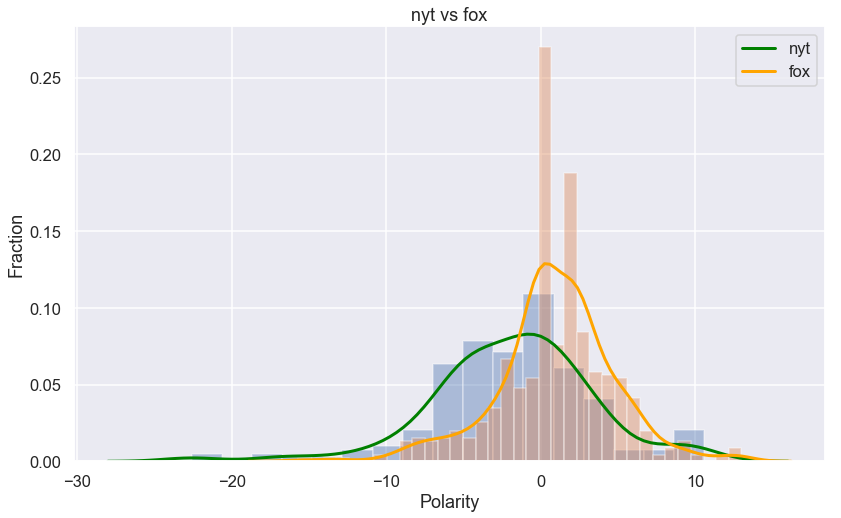

In [43]:
plt.figure(figsize=(12,8))

ax = sns.distplot(nyt, hist=True, kde_kws={"color": "green", "lw": 3, "label": "nyt"})
ax1 = sns.distplot(fox, hist=True, kde_kws={"color": "orange", "lw": 3, "label": "fox"},)
ax.set_xlabel("Polarity")
ax.set_ylabel("Fraction")
ax.set_title('nyt vs fox')
plt.show()

##### Comment on what you observe:

It seems that the tweets on fox give more positive entiment than tweets on nyt.

# PART 5 - Principal Component Analysis (PCA) and Twitter

A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis.
The PCA

The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

# Task 5.1 Cleaning up the Data

Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

In [44]:
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import enchant

df = tidy_format.reset_index()['word'].to_frame()

# Remove stop words
stopWords = set(stopwords.words('english'))
df = df[~df['word'].isin(stopWords)]


# Remove numbers
df = df[~(df['word'].str.isnumeric())]

# Remove word with length smaller than 3
df = df[(df['word'].str.len() > 2)]

# print(df[df['word'] == 'america'])

# Remove non-English words
word_list = df['word'].values.tolist()
# print(word_list)
d = enchant.Dict("en_US")
a = [item for item in word_list if (d.check(item) or d.check(item.capitalize()))]

# print(d.check('America'))

# Sort words by their frequencies, top 50 words
# Get top 50 words and their count (top50, top50_keys)
top50 = Counter(a).most_common(50)
# print(top50)
top50_keys = [letter for letter, count in top50]


df = tidy_format[tidy_format['word'].isin(top50_keys)]


[nltk_data] Downloading package stopwords to /home/yash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
# Only pick the first 5000 tweets with the key words found
id_of_tweets_with_keywords = list(set(list(df.index)))[:5000]

Data = df_trump.loc[ id_of_tweets_with_keywords , 'text' ]

width = 50 # len(top_50_keys)
height = 5000
result = np.zeros((height, width))


# TODO： change top 50 keys to Dataframe and merge it with Tidy format Dataframe
# Using inner-join, group by ID, find count using .size. 
# (Then merge with Dataframe underscore "trump")

def find_freq(full_tweets):
    t = re.sub(regex,' ', full_tweets).split()
    word_dict = Counter(t)
    key_count = np.zeros(50)
    for i in range(50):
        key_count[i] = word_dict[top50_keys[i]]
    return key_count

# Loop through the matrix and sub the 1x50 array into this matrix
for i in range(height):
    result[i,:]= find_freq(Data.iloc[i])

print("Here is the first 10 rows of the sparse matrix:")
print("***Make sure not to modify the 'top50_keys' and 'Data', ohterwise the indice will be messed up***\n")
print(result[:10])


Here is the first 10 rows of the sparse matrix:
***Make sure not to modify the 'top50_keys' and 'Data', ohterwise the indice will be messed up***

[[0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# Task 5.2 Find the PCA's

Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors. You can use upto 80% of the PC's to capture as much variation as possible.


In [46]:
print(top50_keys)

['great', 'amp', 'thank', 'people', 'trump', 'president', 'america', 'country', 'big', 'hillary', 'news', 'get', 'today', 'new', 'many', 'time', 'make', 'fake', 'would', 'clinton', 'democrats', 'border', 'vote', 'much', 'never', 'american', 'one', 'media', 'back', 'good', 'going', 'want', 'jobs', 'years', 'must', 'crooked', 'tax', 'bad', 'like', 'even', 'job', 'wall', 'win', 'state', 'day', 'states', 'election', 'united', 'first', 'security']


In [106]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

pca = decomposition.PCA(n_components=30)

mean = result.mean()
x_std = StandardScaler().fit_transform(result.T - mean)
x_std = pca.fit_transform(x_std)

# norm = x_std.max() - x_std.min()
# mean = x_std.mean()
# x_std = (x_std- mean)/norm
# normalized_X = preprocessing.normalize(x_std)
# print(norm, mean)

In [107]:
# # Check this out: (Not used, leave it here fore now)
# # https://stackoverflow.com/questions/33603787/performing-pca-on-large-sparse-matrix-by-using-sklearn
# # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html
# from sklearn.decomposition import TruncatedSVD
# from scipy import sparse
# result = sparse.csr_matrix(result)
# clf = TruncatedSVD(50)
# Xpca = clf.fit_transform(X)
# clf.explained_variance_ratio_.sum()

# Task 5.3 Examine the PCA

We can examine the PCA results to look at the heatmap. Make a Bokeh grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Although optional, make the plot so that you can hover over each box to the see the loading factor value for that word-component pair. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

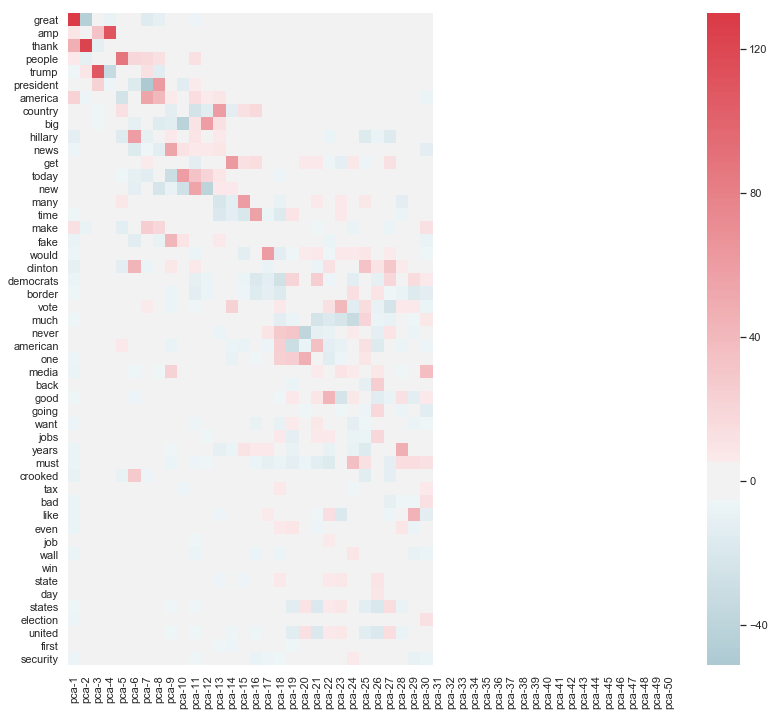

In [108]:

# Make the x-axis labels
pca_list = []
for i in range(1,51):
    pca_list.append('pca-'+str(i))

plt.figure(figsize=(12,12))

# Did not really normalize the graph because the results will not change anyway
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="white")
sns.heatmap(x_std, cmap=cmap, yticklabels = top50_keys, xticklabels = pca_list, center=0)
plt.show()

# Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot (w/o Hillary Clinton). This plot shows PC4 and PC3 for a similar data set analysis. 

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

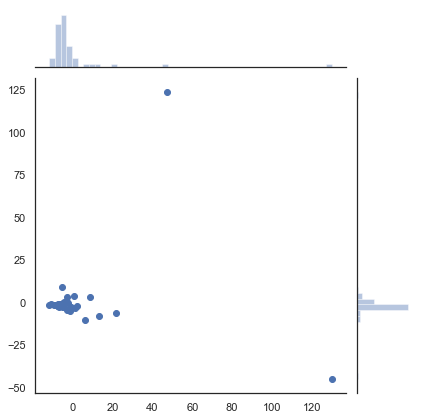

In [109]:
pca1 = (x_std[:,0])
pca2 = (x_std[:,1])
sns.jointplot(pca1, pca2)


## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

# Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [143]:
t = df_trump[['retweet_count']]
t1 = tidy_format[['word']]
temp = t.join(t1.drop_duplicates(), how='left')
# temp
t2 = temp.groupby('word').mean()
t3 =  t2.sort_values(by=['retweet_count'], ascending=False)
t3['kim']

KeyError: 'kim'